# Import the libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

# Import the dataset

In [2]:
df = pd.read_csv('cov_tsa.csv',parse_dates=['REPORT_DATE'])
df

,PEOPLE_POSITIVE_CASES_COUNT,COUNTY_NAME,PROVINCE_STATE_NAME,REPORT_DATE,CONTINENT_NAME,DATA_SOURCE_NAME,PEOPLE_DEATH_NEW_COUNT,COUNTY_FIPS_NUMBER,COUNTRY_ALPHA_3_CODE,COUNTRY_SHORT_NAME,COUNTRY_ALPHA_2_CODE,PEOPLE_POSITIVE_NEW_CASES_COUNT,PEOPLE_DEATH_COUNT
0,7844,Oneida,New York,2020-12-13,America,New York Times,1,36065.0,USA,United States,US,237,188
1,1830,Oneida,New York,2020-07-13,America,New York Times,3,36065.0,USA,United States,US,7,104
2,1776,Oneida,New York,2020-07-08,America,New York Times,1,36065.0,USA,United States,US,16,99
3,19215,Oneida,New York,2021-02-16,America,New York Times,2,36065.0,USA,United States,US,29,462
4,676,Oneida,New York,2020-05-12,America,New York Times,1,36065.0,USA,United States,US,7,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1634240,0,NaN,NaN,2020-01-21,America,JHU CSSE Global Timeseries,0,NaN,MAF,St Martin,MF,0,0
1634241,0,NaN,Macau,2020-01-21,Asia,JHU CSSE Global Timeseries,0,NaN,CHN,China,CN,0,0
1634242,0,NaN,NaN,2020-01-21,America,JHU CSSE Global Timeseries,0,NaN,BRB,Barbados,BB,0,0
1634243,0,NaN,NaN,2020-01-21,Europe,JHU CSSE Global Timeseries,0,NaN,RUS,Russia,RU,0,0


### Check for missing data

In [3]:
df.isna().sum()

PEOPLE_POSITIVE_CASES_COUNT             0
COUNTY_NAME                        124931
PROVINCE_STATE_NAME                 98654
REPORT_DATE                             0
CONTINENT_NAME                       1844
DATA_SOURCE_NAME                        0
PEOPLE_DEATH_NEW_COUNT                  0
COUNTY_FIPS_NUMBER                 150747
COUNTRY_ALPHA_3_CODE                 1844
COUNTRY_SHORT_NAME                      0
COUNTRY_ALPHA_2_CODE                 2305
PEOPLE_POSITIVE_NEW_CASES_COUNT         0
PEOPLE_DEATH_COUNT                      0
dtype: int64

###### Remove unwanted columns

In [4]:
cols=['PEOPLE_POSITIVE_CASES_COUNT','COUNTY_NAME','PROVINCE_STATE_NAME','CONTINENT_NAME','DATA_SOURCE_NAME','COUNTY_FIPS_NUMBER','COUNTRY_ALPHA_3_CODE','COUNTRY_ALPHA_2_CODE','PEOPLE_DEATH_COUNT']
df.drop(cols,axis=1,inplace=True)
df.head()

,REPORT_DATE,PEOPLE_DEATH_NEW_COUNT,COUNTRY_SHORT_NAME,PEOPLE_POSITIVE_NEW_CASES_COUNT
0,2020-12-13,1,United States,237
1,2020-07-13,3,United States,7
2,2020-07-08,1,United States,16
3,2021-02-16,2,United States,29
4,2020-05-12,1,United States,7


###### Again check for missing data

In [5]:
df.isna().sum()

REPORT_DATE                        0
PEOPLE_DEATH_NEW_COUNT             0
COUNTRY_SHORT_NAME                 0
PEOPLE_POSITIVE_NEW_CASES_COUNT    0
dtype: int64

###### Take only datas of USA

In [6]:
usa = df[df['COUNTRY_SHORT_NAME']=='United States']
usa

,REPORT_DATE,PEOPLE_DEATH_NEW_COUNT,COUNTRY_SHORT_NAME,PEOPLE_POSITIVE_NEW_CASES_COUNT
0,2020-12-13,1,United States,237
1,2020-07-13,3,United States,7
2,2020-07-08,1,United States,16
3,2021-02-16,2,United States,29
4,2020-05-12,1,United States,7
...,...,...,...,...
1538886,2020-01-21,0,United States,0
1538887,2020-01-21,0,United States,0
1538888,2020-01-21,0,United States,0
1538889,2020-01-21,0,United States,0


###### Take cases data

In [7]:
usa_cases = usa[['REPORT_DATE','PEOPLE_POSITIVE_NEW_CASES_COUNT']]
usa_cases

,REPORT_DATE,PEOPLE_POSITIVE_NEW_CASES_COUNT
0,2020-12-13,237
1,2020-07-13,7
2,2020-07-08,16
3,2021-02-16,29
4,2020-05-12,7
...,...,...
1538886,2020-01-21,0
1538887,2020-01-21,0
1538888,2020-01-21,0
1538889,2020-01-21,0


###### Aggregate the case reports happened on same dates

In [8]:
usa_cases = usa_cases.groupby('REPORT_DATE')['PEOPLE_POSITIVE_NEW_CASES_COUNT'].sum().reset_index()
usa_cases

,REPORT_DATE,PEOPLE_POSITIVE_NEW_CASES_COUNT
0,2020-01-21,1
1,2020-01-22,0
2,2020-01-23,0
3,2020-01-24,1
4,2020-01-25,1
...,...,...
456,2021-04-21,60514
457,2021-04-22,66358
458,2021-04-23,63752
459,2021-04-24,50575


###### Change the index of the dataframe to dates

In [9]:
usa_cases = usa_cases.set_index('REPORT_DATE')
usa_cases

,PEOPLE_POSITIVE_NEW_CASES_COUNT
REPORT_DATE,
2020-01-21,1
2020-01-22,0
2020-01-23,0
2020-01-24,1
2020-01-25,1
...,...
2021-04-21,60514
2021-04-22,66358
2021-04-23,63752


###### Check the frequency followed by index dates

In [10]:
usa_cases.index

DatetimeIndex(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28',
               '2020-01-29', '2020-01-30',
               ...
               '2021-04-16', '2021-04-17', '2021-04-18', '2021-04-19',
               '2021-04-20', '2021-04-21', '2021-04-22', '2021-04-23',
               '2021-04-24', '2021-04-25'],
              dtype='datetime64[ns]', name='REPORT_DATE', length=461, freq=None)

###### Indicate the frequency is happening by day

In [11]:
usa_cases.index.freq='D'

In [12]:
usa_cases.index

DatetimeIndex(['2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
               '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28',
               '2020-01-29', '2020-01-30',
               ...
               '2021-04-16', '2021-04-17', '2021-04-18', '2021-04-19',
               '2021-04-20', '2021-04-21', '2021-04-22', '2021-04-23',
               '2021-04-24', '2021-04-25'],
              dtype='datetime64[ns]', name='REPORT_DATE', length=461, freq='D')

In [13]:
usa_cases['PEOPLE_POSITIVE_NEW_CASES_COUNT']

REPORT_DATE
2020-01-21        1
2020-01-22        0
2020-01-23        0
2020-01-24        1
2020-01-25        1
              ...  
2021-04-21    60514
2021-04-22    66358
2021-04-23    63752
2021-04-24    50575
2021-04-25    33662
Freq: D, Name: PEOPLE_POSITIVE_NEW_CASES_COUNT, Length: 461, dtype: int64

# Visualization

<AxesSubplot:xlabel='REPORT_DATE'>

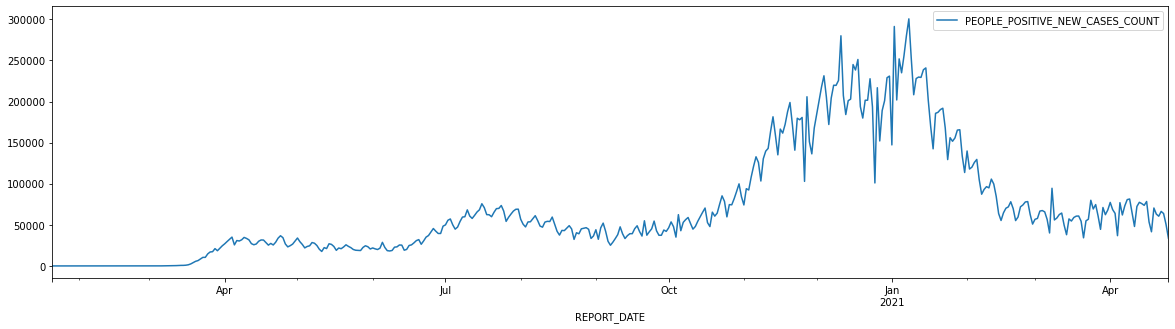

In [14]:
usa_cases.plot(figsize=(20,5))

# Train test split

In [15]:
len(usa_cases)

461

In [16]:
len(usa_cases)-14

447

In [17]:
train_usa_cases = usa_cases.iloc[:447]
test_usa_cases = usa_cases.iloc[447:]

In [18]:
len(test_usa_cases)

14

# Scale Data


In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

In [21]:
scaler.fit(train_usa_cases)

MinMaxScaler()

In [22]:
scaled_train = scaler.transform(train_usa_cases)
scaled_test = scaler.transform(test_usa_cases)

# Time Series Generator

In [23]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [24]:
scaled_train

array([[3.32591654e-06],
       [0.00000000e+00],
       [0.00000000e+00],
       [3.32591654e-06],
       [3.32591654e-06],
       [6.65183308e-06],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [3.32591654e-06],
       [3.32591654e-06],
       [3.32591654e-06],
       [9.97774962e-06],
       [0.00000000e+00],
       [0.00000000e+00],
       [3.32591654e-06],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [3.32591654e-06],
       [0.00000000e+00],
       [3.32591654e-06],
       [3.32591654e-06],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [3.32591654e-05],
       [0.00000000e+00],
       [0.00000000e+00],
       [6.65183308e-06],
       [9.97774962e-06],
       [0.00000000e+00],
       [0.00000000e+00],
       [4.32369150e-05],
       [6.65183308e-06],
       [4.98887481e-05],
       [0.00000000e+00],
       [1.66295827e-05],
       [1.66295827e-05],


In [25]:
scaled_test

array([[0.24080301],
       [0.2575357 ],
       [0.25223086],
       [0.245293  ],
       [0.260835  ],
       [0.17805959],
       [0.13824172],
       [0.23444386],
       [0.20992187],
       [0.20126451],
       [0.22070117],
       [0.21203383],
       [0.16820823],
       [0.111957  ]])

In [26]:
# define generator
n_input = 7
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [27]:
len(scaled_train)

447

In [28]:
len(generator)

440

In [29]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [30]:
#Define the model
#Here we use stacked LSTM
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_input, n_features)))
model.add(LSTM(100,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 7, 100)            40800     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


In [32]:
# fit model
model.fit_generator(generator,epochs=15)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
440/440 [==============================] - 1s 3ms/step - loss: 0.0092
Epoch 2/15
440/440 [==============================] - 1s 3ms/step - loss: 0.0049
Epoch 3/15
440/440 [==============================] - 1s 3ms/step - loss: 0.0049
Epoch 4/15
440/440 [==============================] - 1s 3ms/step - loss: 0.0053
Epoch 5/15
440/440 [==============================] - 1s 3ms/step - loss: 0.0051
Epoch 6/15
440/440 [==============================] - 1s 3ms/step - loss: 0.0043
Epoch 7/15
440/440 [==============================] - 1s 3ms/step - loss: 0.0043
Epoch 8/15
440/440 [==============================] - 1s 3ms/step - loss: 0.0045
Epoch 9/15
440/440 [==============================] - 1s 3ms/step - loss: 0.0037
Epoch 10/15
440/440 [==============================] - 1s 3ms/step - loss: 0.0039
Epoch 11/15
440/440 [==============================] - 1s 3ms/step - loss: 0.0041
Epoch 12/15
440/440 [==========

In [33]:
model.history.history.keys()

dict_keys(['loss'])

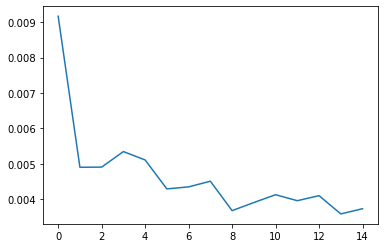

In [34]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [35]:
#test_predictions used to holding my predictions,bcz we wanna later plot it out
test_predictions = [] 

#last n input points from the training set
first_eval_batch = scaled_train[-n_input:]
#in Above step we grab the first evaluation batch

#reshape this to the format RNN wants(same format as TimeSeriesGenerator)
current_batch = first_eval_batch.reshape((1,n_input,n_features))


#How far into the future will i forecast

for i in range(len(test_usa_cases)): #here we are only forecasting to the test length of the future
    
    #One time step ahead of historical 12 points
    current_pred = model.predict(current_batch)[0] #we give 0 here to reshape it to the format we need
    
    #Store that prediction
    test_predictions.append(current_pred)
    
    #then we are gonna update the current batch to include the prediction
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
#rememeber the first current batch is essentailly gonna look like the first evaluation batch

In [36]:
test_predictions

[array([0.24554226], dtype=float32),
 array([0.24273783], dtype=float32),
 array([0.24744606], dtype=float32),
 array([0.24911678], dtype=float32),
 array([0.24851075], dtype=float32),
 array([0.2470378], dtype=float32),
 array([0.25000593], dtype=float32),
 array([0.2593161], dtype=float32),
 array([0.26095244], dtype=float32),
 array([0.2630979], dtype=float32),
 array([0.26506975], dtype=float32),
 array([0.26710021], dtype=float32),
 array([0.26932678], dtype=float32),
 array([0.271922], dtype=float32)]

In [37]:
true_predictions = scaler.inverse_transform(test_predictions)

In [38]:
true_predictions

array([[73826.94517788],
       [72983.74051362],
       [74399.35946846],
       [74901.69263685],
       [74719.4781349 ],
       [74276.60773686],
       [75169.03316626],
       [77968.30849278],
       [78460.31004962],
       [79105.38612512],
       [79698.25754419],
       [80308.75453126],
       [80978.21249315],
       [81758.51350343]])

In [39]:
test_usa_cases

,PEOPLE_POSITIVE_NEW_CASES_COUNT
REPORT_DATE,
2021-04-12,72402
2021-04-13,77433
2021-04-14,75838
2021-04-15,73752
2021-04-16,78425
2021-04-17,53537
2021-04-18,41565
2021-04-19,70490
2021-04-20,63117


In [40]:
test_usa_cases['Predictions'] = true_predictions

In [41]:
test_usa_cases

,PEOPLE_POSITIVE_NEW_CASES_COUNT,Predictions
REPORT_DATE,,
2021-04-12,72402,73826.945178
2021-04-13,77433,72983.740514
2021-04-14,75838,74399.359468
2021-04-15,73752,74901.692637
2021-04-16,78425,74719.478135
2021-04-17,53537,74276.607737
2021-04-18,41565,75169.033166
2021-04-19,70490,77968.308493
2021-04-20,63117,78460.310050


<AxesSubplot:xlabel='REPORT_DATE'>

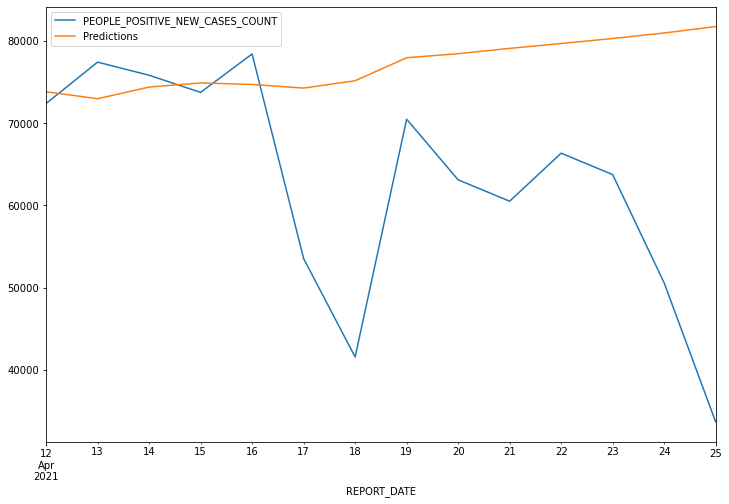

In [42]:
test_usa_cases.plot(figsize=(12,8))